In [15]:
import numpy as np
import pandas as pd
import os

In [16]:
# Loading the Data
path = r"C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic\data"
os.chdir(path)

df = pd.read_csv("titanic_cleaned.csv")


In [17]:
# Dropping an unnecesesary column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
# Mapping 0 & 1 with values
df['Survived'] = df['Survived'].astype(int).map({0: 'Died', 1: 'Survived'})
df = df[df['Embarked'] != '28.0']

In [19]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
654,655,Died,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.75,Q


# Visualization

In [20]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

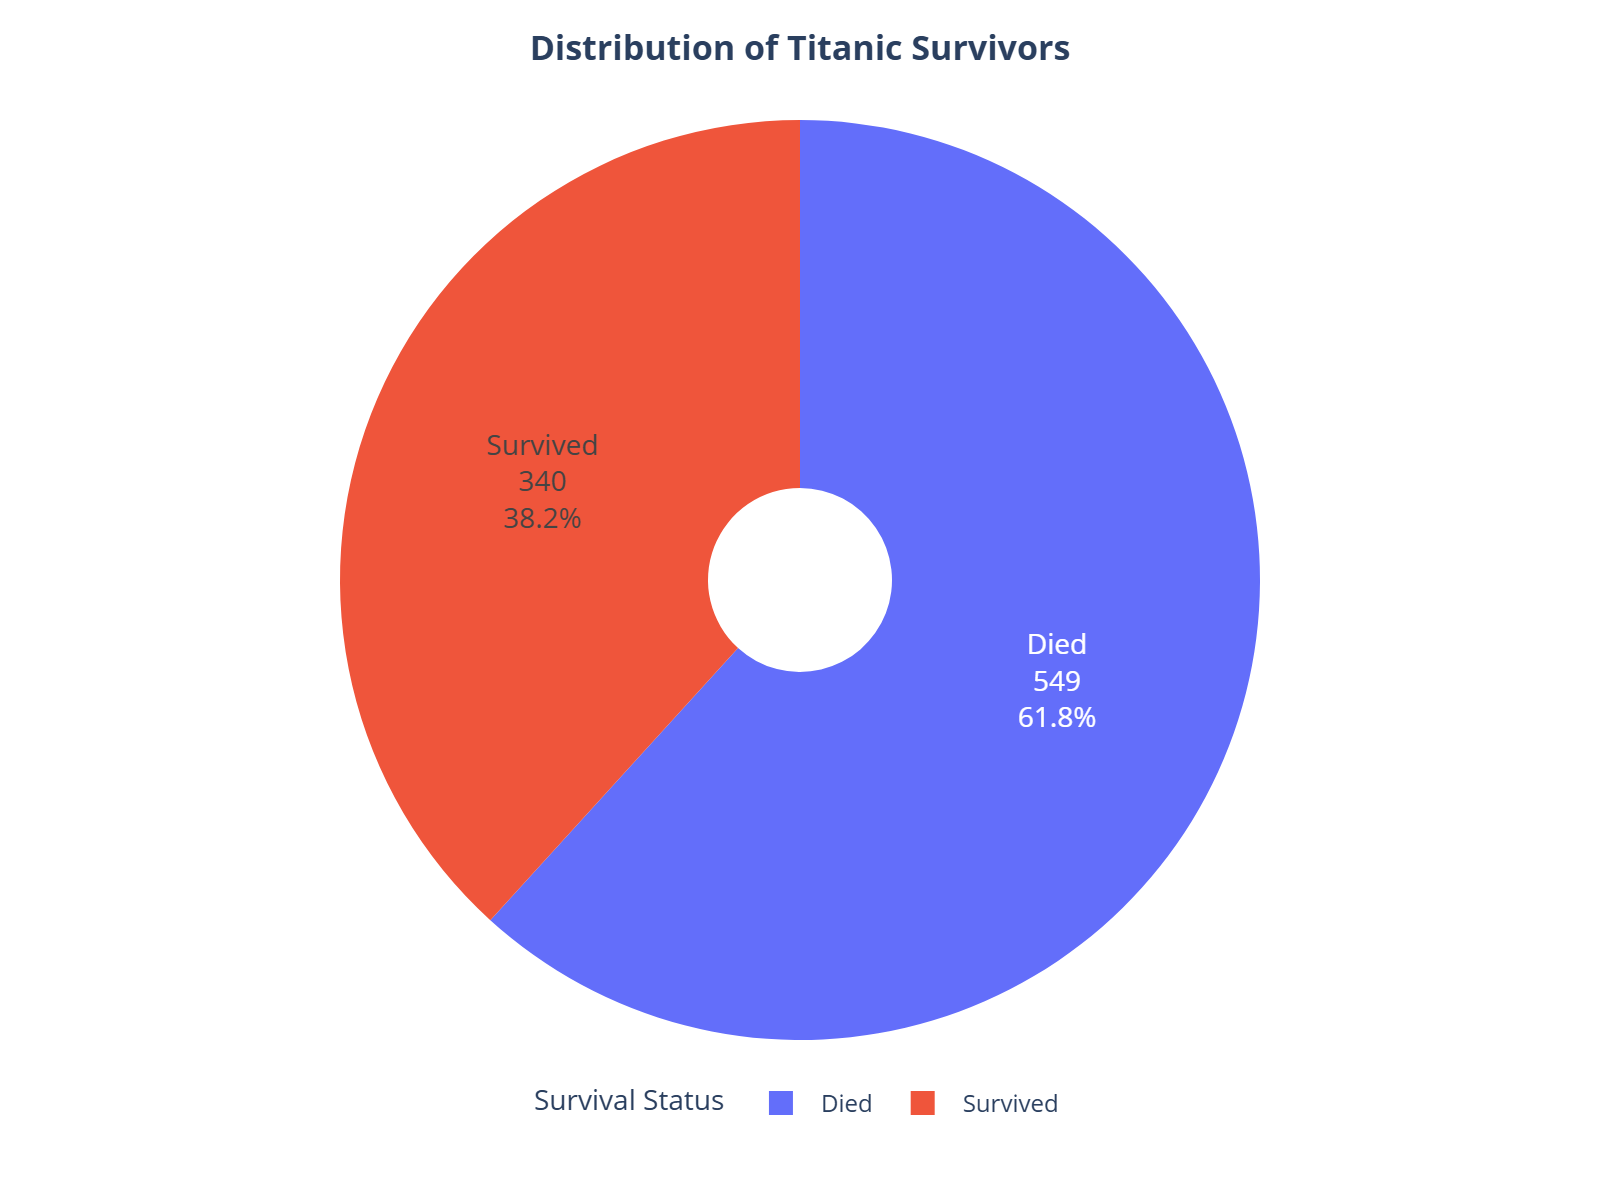

In [23]:
# Visualizing the distribution os the Survivors (0=Died, 1=Survived)

survived_dist= df['Survived'].value_counts().reset_index()

survived_dist.columns = ['Survived', 'Count']

fig = px.pie(
    values=survived_dist['Count'],
    
    hole=0.2,
    names=survived_dist['Survived']
)
fig.update_traces(textinfo='text+percent+label+value', textfont_size=14)
fig.update_layout(
    title_text='<b>Distribution of Titanic Survivors</b>',
    title_x=0.5,  # center title
    legend_title='Survival Status',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    )
)

fig.show('png', height=600, width=800, scale=2)

### Survived insights
**Died (0)**- Majority of the people in the Titanic died 549(62%)

**Survived (1)**- Only 342 People survived

C:\Users\USER\AppData\Local\Temp\ipykernel_12700\3131187395.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



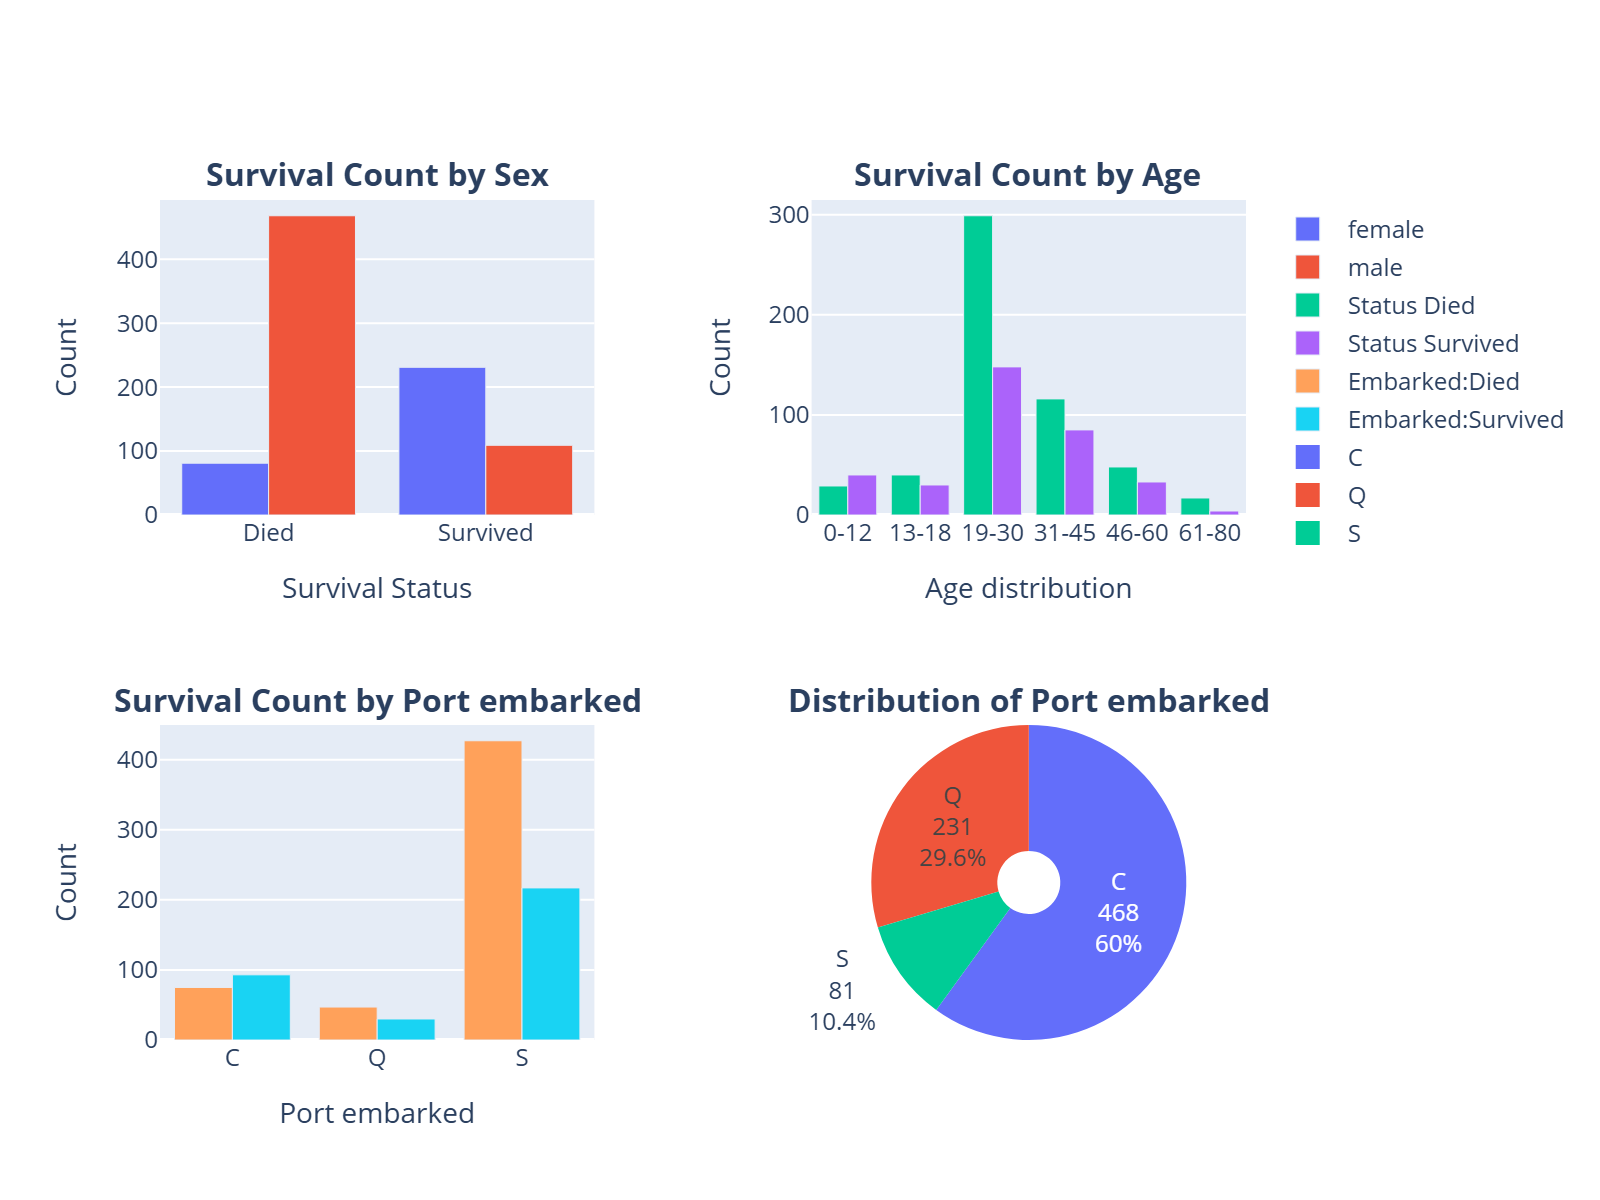

In [24]:
# Visualizing Survived with other features

fig = go.Figure()
fig = make_subplots(
    rows=2, cols=2,
    horizontal_spacing=0.2,
    subplot_titles=['<b>Survival Count by Sex</b>', '<b>Survival Count by Age</b>', '<b>Survival Count by Port embarked</b>', '<b>Distribution of Port embarked</b>'],
    specs=[[{'type': 'xy'}, {'type': 'xy'}],[{'type': 'xy'}, {'type': 'domain'}]]
)
grouped = df.groupby(['Survived','Sex']).size().reset_index(name='Count')
for sex in grouped['Sex'].unique():
    subset= grouped[grouped['Sex']== sex]
    fig.add_trace(
        go.Bar(
            x=subset['Survived'],
            y=subset['Count'],
            name=sex
        ), row=1, col=1
    )

df['Age_group'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 45, 60, 80], labels=['0-12', '13-18', '19-30', '31-45', '46-60', '61-80'])
grouped1 = df.groupby(['Survived','Age_group']).size().reset_index(name='Count')
for surv in grouped1['Survived'].unique():
    subset1 = grouped1[grouped1['Survived'] == surv]
    fig.add_trace(
        go.Bar(
            x=subset1['Age_group'].astype(str),
            y=subset1['Count'],
            name=f"Status {surv}"
        ),
        row=1, col=2
    )
grouped2 =df.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')
for vals in df['Survived'].unique():
    subset2 = grouped2[grouped2['Survived'] == vals]
    fig.add_trace(
        go.Bar(
            x= subset2['Embarked'].astype(str),
            y=subset2['Count'],
            name=f'Embarked:{vals}'
        ), row=2, col=1
    )
grouped3 = df['Embarked'].value_counts().reset_index()
grouped3.columns = ['Embarked', 'Count']
fig.add_trace(
    go.Pie(
        values=grouped['Count'],
        labels=grouped3['Embarked'],
        hole =0.2,
        textinfo='label+percent+value',  
        insidetextorientation='auto' 
    ), row=2, col=2
)
    

fig.update_xaxes(title_text='Survival Status', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_xaxes(title_text='Age distribution ', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=2)
fig.update_xaxes(title_text='Port embarked ', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=1)

fig.update_layout(
    height=600,
    width=800
    )

fig.show('png', height=600, width=800, scale=2)
fig.show()


###  **Survival Count by Sex**
- 🔵 **Females** had a **much higher survival rate** compared to males.
- 🔴 **Males** experienced the **highest number of deaths**.
- Supports the historical principle of "**women and children first**" during evacuation.

### **Survival Count by Age**
- 🟩 **Passengers aged 19–30** were the most numerous but had the **highest death count**.
- 🟪 **Children (0–12)** had a **higher chance of survival** than older groups.
- **Older adults (46+)** had **lower survival rates**, with more deaths than survivals.

### **Survival Count by Embarkation Port**
-  **Passengers from Southampton (S)** made up the **largest group**, with **more deaths than survivals**.
-  **Cherbourg (C) passengers** had a **higher survival rate** compared to the other ports.
-  **Queenstown (Q)** had the **lowest overall passenger count**, with **slightly more deaths than survivals**.
- Suggests that **embarkation port may reflect socio-economic status or cabin class**, influencing survival chances.


C:\Users\USER\AppData\Local\Temp\ipykernel_12700\1533090905.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\USER\AppData\Local\Temp\ipykernel_12700\1533090905.py:45: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



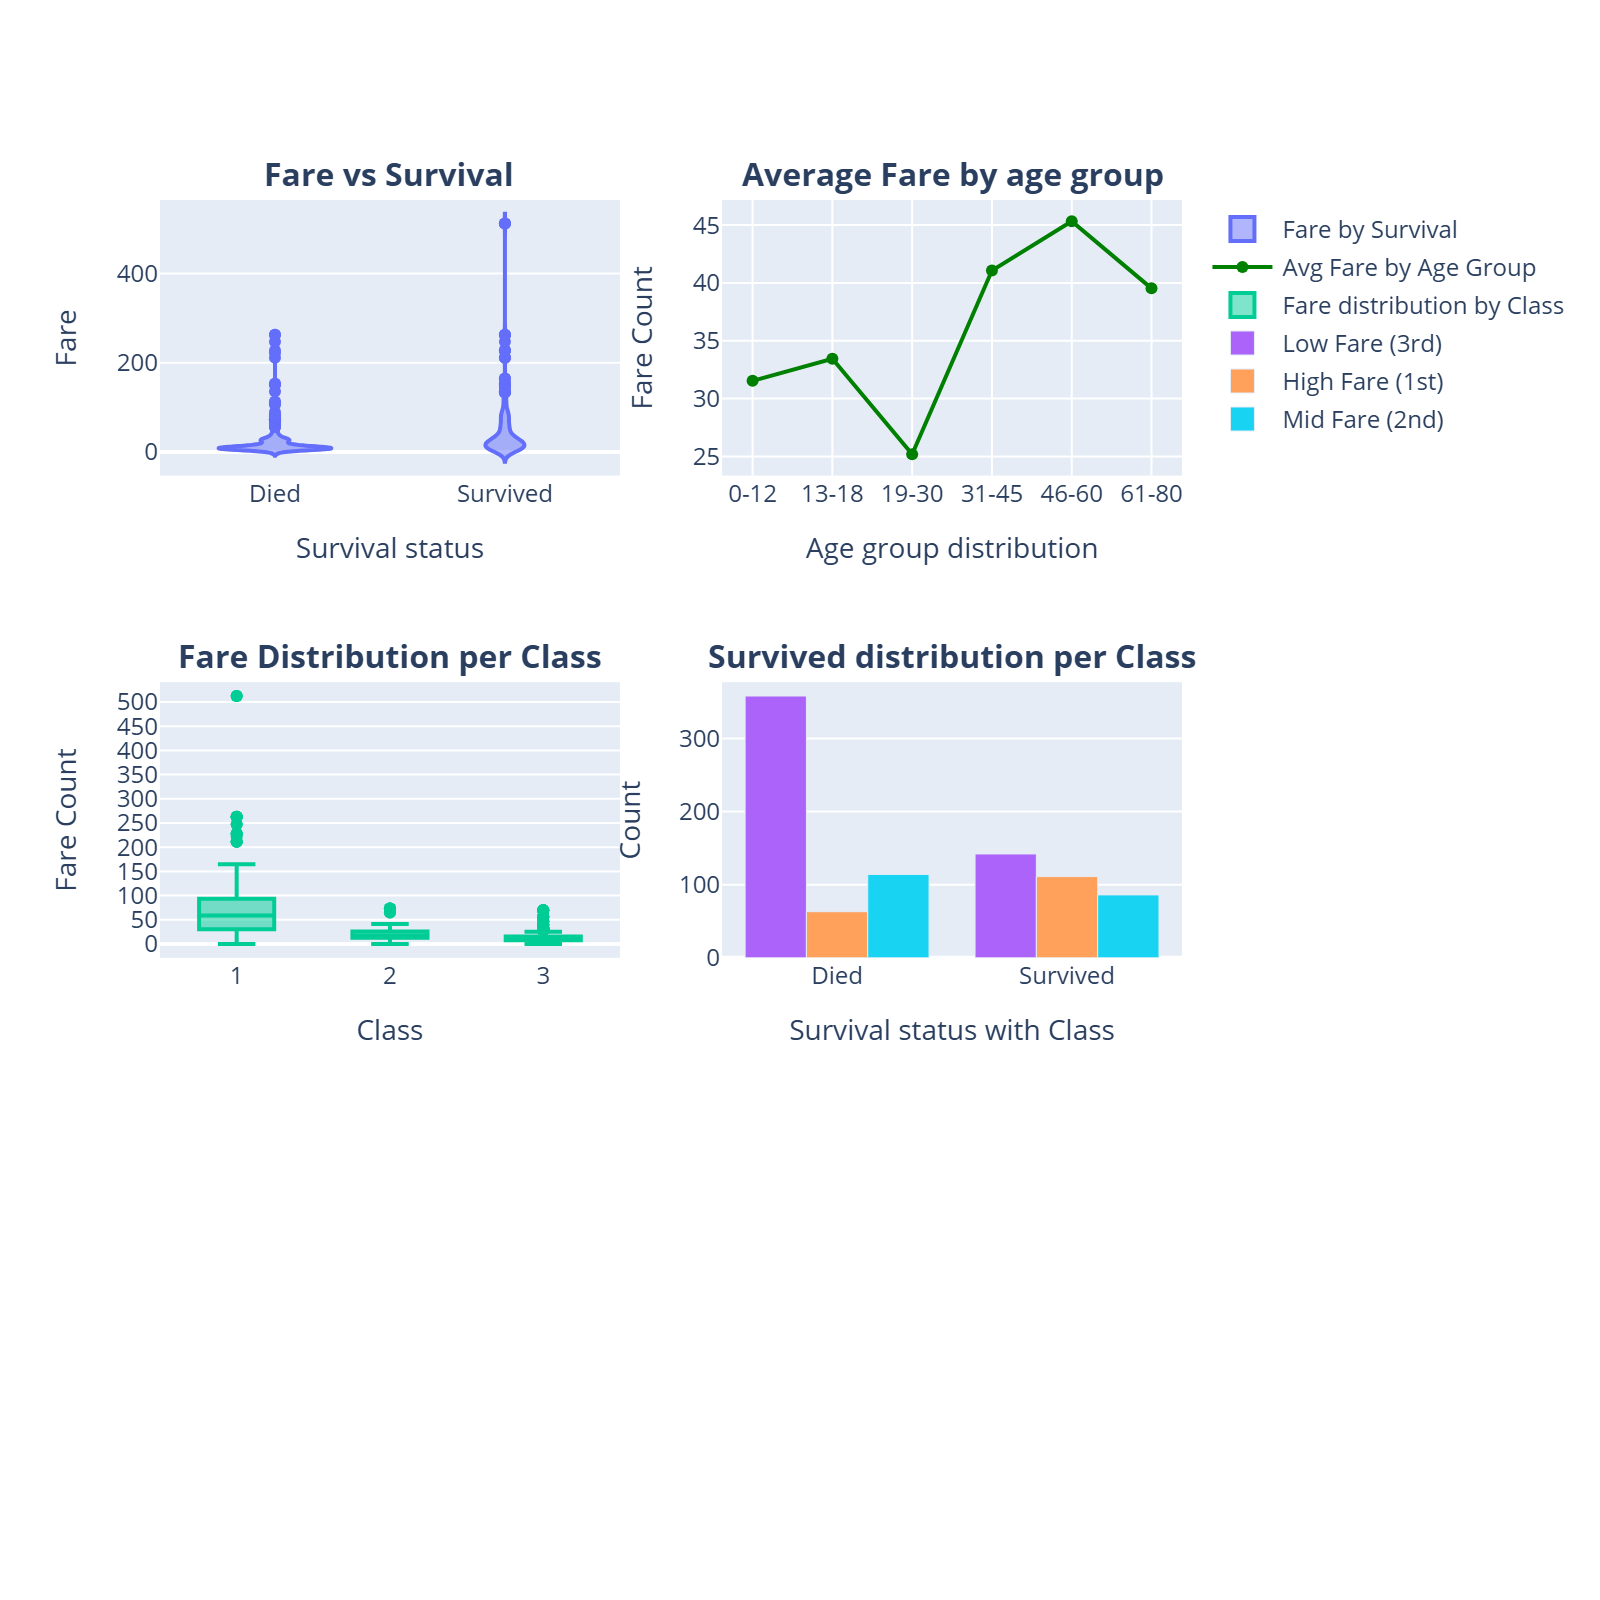

In [57]:
# Visualizing the fare against other features

fig = go.Figure()

fig = make_subplots(
    rows=3, cols=2,
    horizontal_spacing=0.1,
    subplot_titles=['<b>Fare vs Survival</b>', '<b>Average Fare by age group</b>','<b>Fare Distribution per Class</b>','<b>Survived distribution per Class</b>'],
    specs=[[{'type': 'xy'}, {'type': 'xy'}],[{'type': 'xy'}, {'type': 'xy'}], [{'type': 'xy'}, None]]

)
fig.add_trace(
    go.Violin(
        x=df['Survived'],
        y=df['Fare'],
        name="Fare by Survival"
    
    ), row=1, col=1
)
grouped = df.groupby('Age_group')['Fare'].mean().reset_index()
fig.add_trace(
    go.Scatter(
        x=grouped['Age_group'],
        y=grouped['Fare'],
        mode='lines+markers',
        marker=dict(color='green'),
        name='Avg Fare by Age Group'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Box(
        x=df['Pclass'],
        y=df['Fare'],
        name='Fare distribution by Class'
    ),row=2, col=1
)

bins = [0, 20, 40, 600]
labels = ['Low Fare (3rd)', 'Mid Fare (2nd)', 'High Fare (1st)']

df['FareBin'] = pd.cut(df['Fare'], bins=bins, labels=labels)

grouped_fare = df.groupby(['Survived','FareBin']).size().reset_index(name='Count')
for values in df['FareBin'].unique():
    sub = grouped_fare[ grouped_fare['FareBin']==values]
    fig.add_trace(
        go.Bar(
            x=sub['Survived'],
            y=sub['Count'],
            name=values
        ), row=2, col=2
    )


fig.update_xaxes(title_text='Survival status', row=1, col=1)
fig.update_yaxes(title_text='Fare', row=1, col=1)
fig.update_xaxes(title_text='Age group distribution', row=1, col=2)
fig.update_yaxes(title_text='Fare Count', row=1, col=2)
fig.update_xaxes(title_text='Class', row=2, col=1)
fig.update_yaxes(title_text='Fare Count', row=2, col=1, dtick=50)
fig.update_xaxes(title_text='Survival status with Class', row=2, col=2)
fig.update_yaxes(title_text='Count', row=2, col=2)

fig.update_layout(
    height=800,
    width=800
    )

fig.show('png', height=800, width=800, scale=2)
fig.show()

### Violin plot for Fare and Survival

- Passengers who paid **higher fares** had **higher survival rates**.
- Most deaths occurred among those who paid **lower fares**.
- The fare distribution is **right-skewed**, with high-value outliers mostly surviving.
- Indicates a strong link between **fare (and likely class)** and **survival chances**. Passengers who paid higher fares had better survival chances, highlighting the impact of **social class and cabin access** during the Titanic evacuation.

### Line plot for Average Fare by Age Group

- **Fare increases with age**, peaking in the **46–60** age group.
- Children and teenagers (0–18) generally paid **lower fares**, likely reflecting their dependence on adults or travel in groups.
- The **19–30** group shows a notable dip, possibly representing young, budget-conscious travelers.
- The trend suggests **older passengers** were more likely to travel in **premium classes**, possibly contributing to their higher survival chances as seen in the violin plot.

### Box plot for Fare Distribution per Class

- Clear **fare disparity across classes**:
  - **1st Class** passengers paid the highest fares, with a **median around 58.7**.
  - **2nd Class** passengers had a moderate fare distribution.
  - **3rd Class** passengers had the lowest fares, with a **median around 8.05**.
- Outliers in 1st class show that some passengers paid **extremely high fares**, indicating luxury accommodations.
- This distribution confirms **strong fare stratification by class**, reinforcing the relationship between fare, class, and survival chances.

### Grouped bar plot for Survived Distribution per Class

- **Majority of deaths occurred in 3rd class**, especially among low-fare passengers.
- **1st Class** passengers had a much higher survival rate.
- **2nd Class** passengers had survival and death rates that were more balanced but still skewed toward survival.
- Indicates that **class had a significant effect on survival**, with **1st class passengers most likely to survive**, likely due to **preferential access to lifeboats and better cabin locations**.



In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,FareBin
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,19-30,Low Fare (3rd)
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-45,High Fare (1st)
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,19-30,Low Fare (3rd)
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-45,High Fare (1st)
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-45,Low Fare (3rd)
